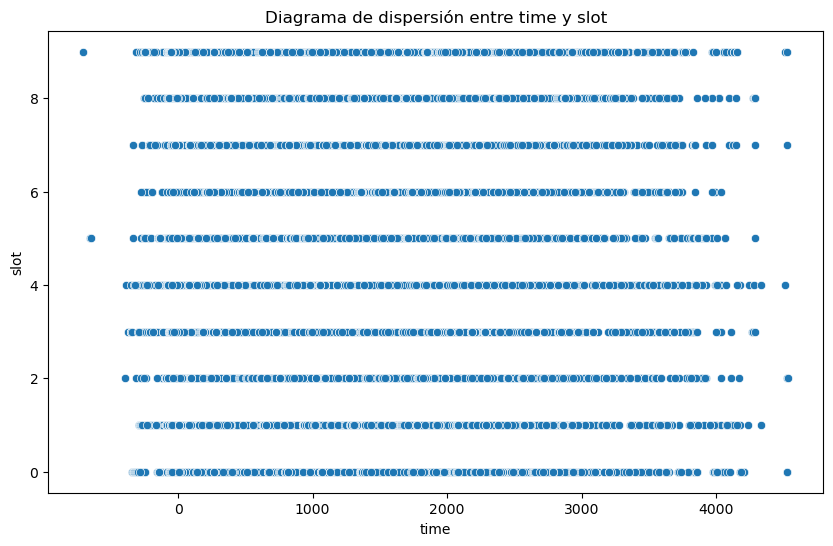

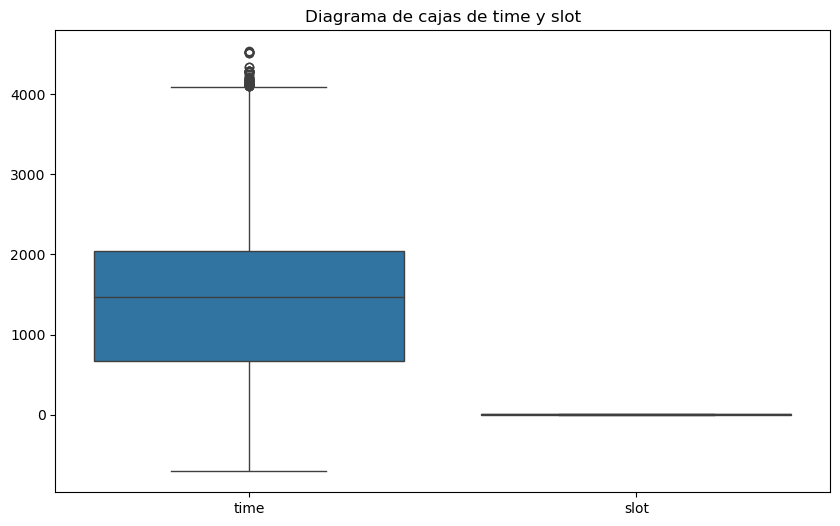

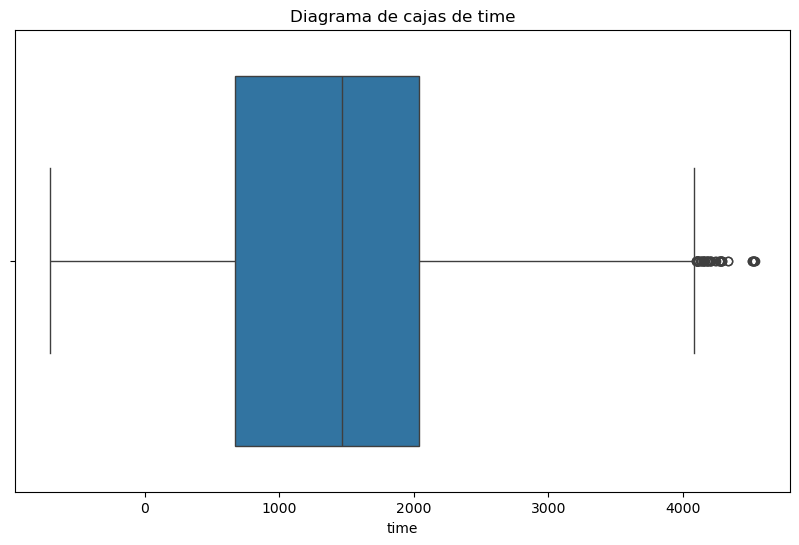

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
data_translate = pd.read_csv(r'C:\Users\migui\Repositorios_GH\Toxic-Games-TFG\data_translate.csv')

# Diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='time', y='slot', data=data_translate)
plt.title('Diagrama de dispersión entre time y slot')
plt.xlabel('time')
plt.ylabel('slot')
plt.show()

# Diagrama de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_translate[['time', 'slot']])
plt.title('Diagrama de cajas de time y slot')
plt.show()

# Diagrama de cajas para una variable específica
plt.figure(figsize=(10, 6))
sns.boxplot(x='time', data=data_translate)
plt.title('Diagrama de cajas de time')
plt.xlabel('time')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\migui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


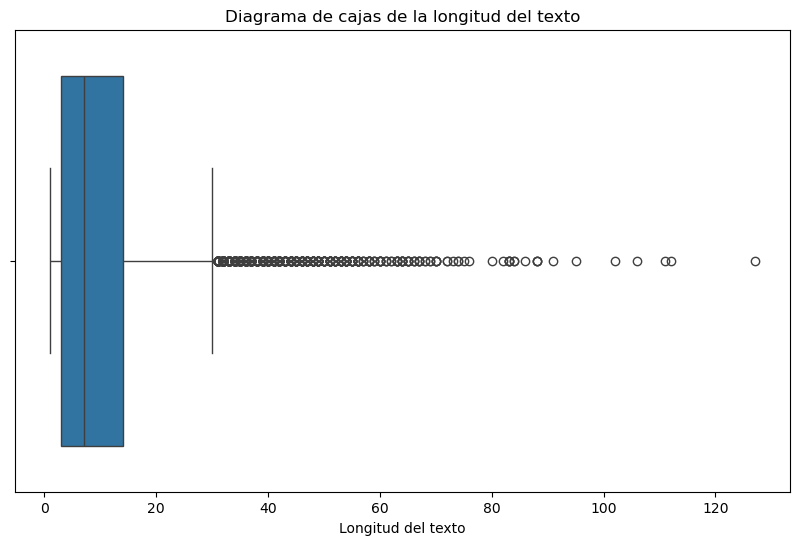

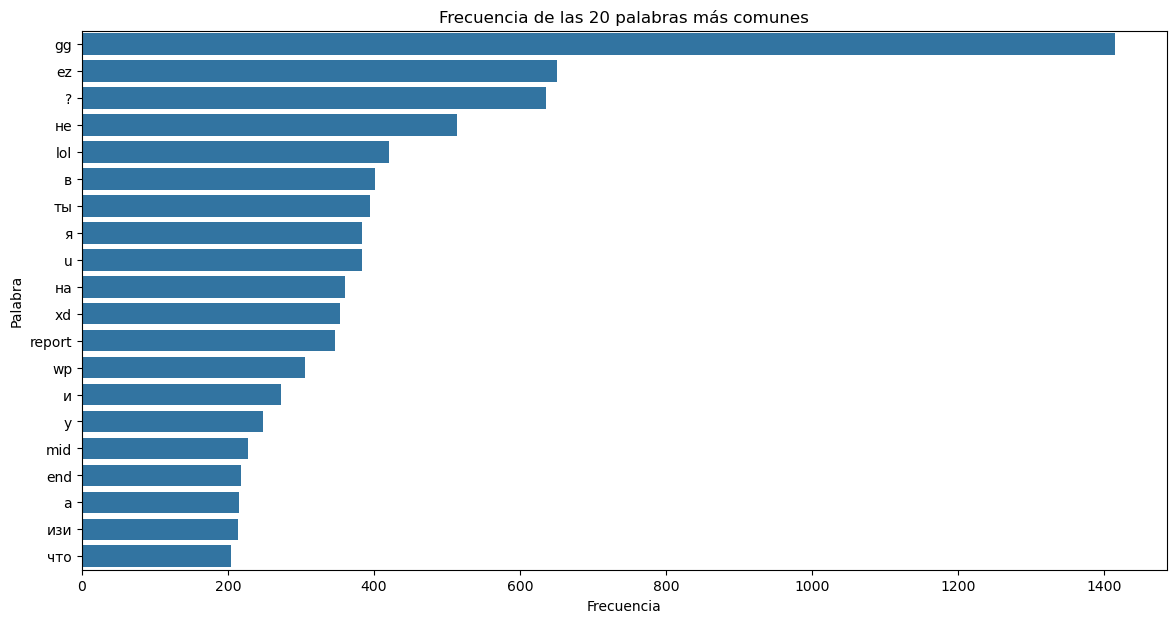

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Descargar stopwords
nltk.download('stopwords')

# Cargar el conjunto de datos
data_translate = pd.read_csv(r'C:\Users\migui\Repositorios_GH\Toxic-Games-TFG\data_translate.csv')

# Añadir columna con la longitud del texto
data_translate['text_length'] = data_translate['text'].astype(str).apply(len)

# Diagrama de cajas para la longitud del texto
plt.figure(figsize=(10, 6))
sns.boxplot(x='text_length', data=data_translate)
plt.title('Diagrama de cajas de la longitud del texto')
plt.xlabel('Longitud del texto')
plt.show()

# Contar la frecuencia de las palabras
stop_words = set(stopwords.words('english'))
all_words = ' '.join(data_translate['text'].astype(str)).lower().split()
filtered_words = [word for word in all_words if word not in stop_words]
word_freq = Counter(filtered_words)

# Convertir a DataFrame para facilitar la visualización
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Diagrama de barras de las 20 palabras más frecuentes
plt.figure(figsize=(14, 7))
sns.barplot(x='frequency', y='word', data=word_freq_df.head(20))
plt.title('Frecuencia de las 20 palabras más comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\migui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


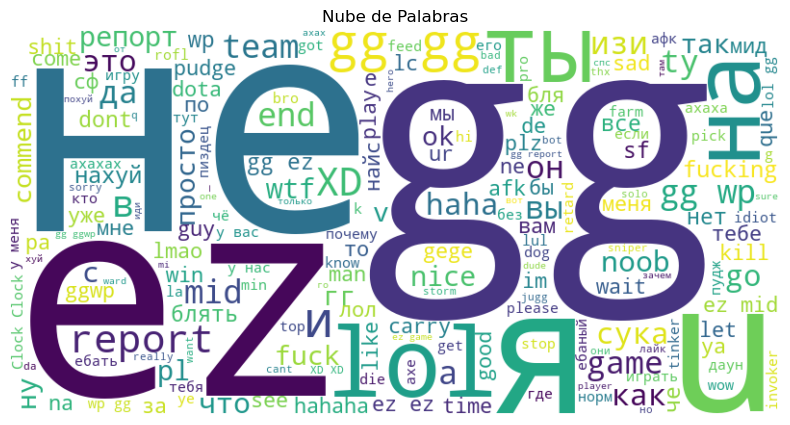

In [10]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Descargar stopwords
nltk.download('stopwords')

# Cargar el conjunto de datos
data_translate = pd.read_csv(r'C:\Users\migui\Repositorios_GH\Toxic-Games-TFG\data_translate.csv')

# Unir todos los textos en un solo string
text = ' '.join(data_translate['text'].astype(str))

# Configurar stopwords
stop_words = set(stopwords.words('english'))

# Generar la nube de palabras
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

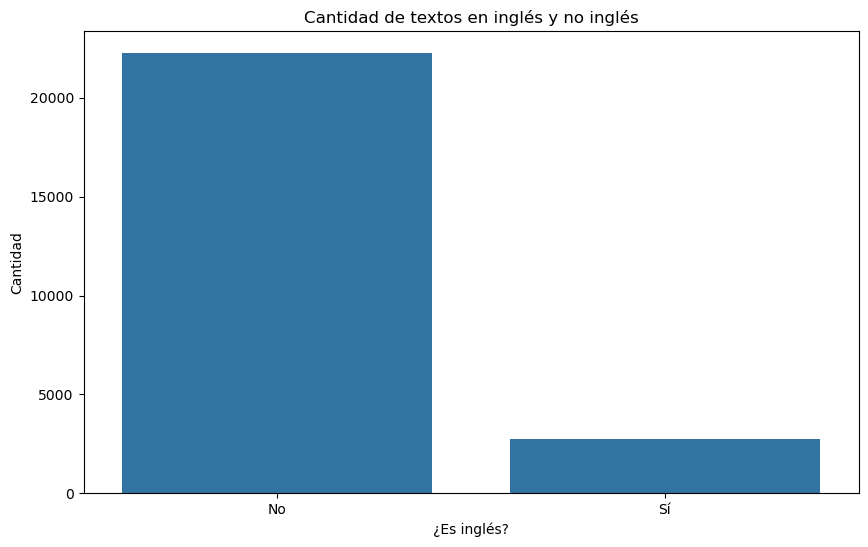

In [1]:

import pandas as pd
from langdetect import detect, DetectorFactory
import langdetect.lang_detect_exception
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar la semilla para reproducibilidad
DetectorFactory.seed = 0

# Función para detectar el idioma
def is_english(text):
    try:
        return detect(text) == 'en'  # Retorna True si el idioma detectado es inglés
    except langdetect.lang_detect_exception.LangDetectException:
        return False  # Si hay un error (ej. texto vacío), lo considera no inglés

# Cargar el conjunto de datos
data_translate = pd.read_csv(r'C:\Users\migui\Repositorios_GH\Toxic-Games-TFG\data_translate.csv')

# Crear una columna que indique si el texto está en inglés o no
data_translate['is_english'] = data_translate['text'].astype(str).apply(is_english)

# Contar la cantidad de textos en inglés y no inglés
english_counts = data_translate['is_english'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=english_counts.index, y=english_counts.values)
plt.title('Cantidad de textos en inglés y no inglés')
plt.xlabel('¿Es inglés?')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

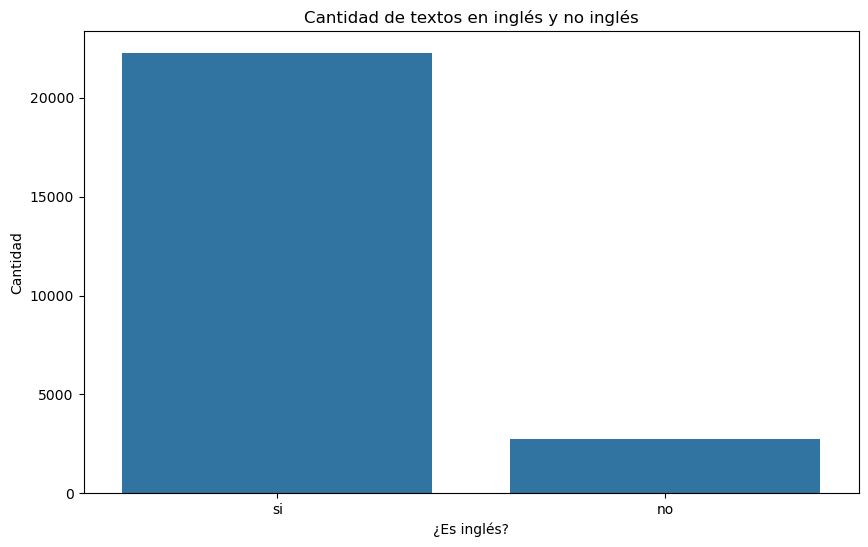

In [3]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=english_counts.index, y=english_counts.values)
plt.title('Cantidad de textos en inglés y no inglés')
plt.xlabel('¿Es inglés?')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['si', 'no'])
plt.show()

In [2]:
data_translate.head(30)

,match,time,slot,text,text_en,is_english
0,0,1005.12122,9,ладно гг,Okay.,False
1,0,1005.85442,9,изи,Easy,False
2,0,1008.65372,9,од,"- Yeah, yeah, yeah, yeah, yeah, yeah, yeah, ye...",False
3,0,1010.51992,9,ебаный,You're fucking kidding me.,False
4,0,1013.91912,9,мусор на войде,There's garbage in the door.,False
5,0,1800.31402,9,мусор,rubbish,False
6,0,1801.71882,9,на войде,at the entrance,False
7,0,1802.98982,9,репорт,Report,False
8,0,1808.40822,9,100%,100%,False
9,1,-131.14018,0,twitch.tv/rage_channel,Twitch.tv/range_channel,True
